# Bank Marketing - Classification project

**Petra Havlickova**

## Dataset information

### Bank client data:
- `age` (numeric)
- `job` type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default` has credit in default? (categorical: 'no','yes','unknown')
- `housing` has housing loan? (categorical: 'no','yes','unknown')
- `loan` has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
- `contact` contact communication type (categorical: 'cellular','telephone')
- `month` last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week` last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- `duration` last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes :
- `campaign` number of contacts performed during this campaign and for this client (numeric, includes last contact)
- `pdays` number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous` number of contacts performed before this campaign and for this client (numeric)
- `poutcome` outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
### Social and economic context attributes
- `emp.var.rate` employment variation rate - quarterly indicator (numeric)
- `cons.price.idx` consumer price index - monthly indicator (numeric)
- `cons.conf.idx` consumer confidence index - monthly indicator (numeric)
- `euribor3m` euribor 3 month rate - daily indicator (numeric)
- `nr.employed` number of employees - quarterly indicator (numeric)

Output variable (desired target):
- `y` has the client subscribed a term deposit? (binary: 'yes','no')

## Libraries

In [1]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

## Goal

We would like to predict whether a client subscribed a term deposit or not, based o the available information. First, we start with EDA - exploratory data analysis, then we continue with cleaning of the data, feature engineering and finish with the modelling.

## 1. Data loading

In [2]:
# zf = zipfile.ZipFile('../IntroDataScience/3_artificial_use_case/1_Classification/Bank_Marketing/Bank_Dataset/bank-additional-full.zip') 
zf = zipfile.ZipFile('Bank_Dataset/bank-additional-full.zip') 
df = pd.read_csv(zf.open('bank-additional-full.csv'), sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. First look

Here we have a first look at the data.

- shape - how many data points and features we have
- data type of the features
- missing values
- unique values for each feature
- duplicates
- basic statistics

In [4]:
df.shape

(41188, 21)

We have more than 40k samples, 20 features and 1 target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are quite some features of type 'object', we will have a closer look at them later to see which can be tranasformed to categorical variables. We see we do not have any missing values. Nice! :) Let's just quickly prove it.

In [6]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Now we check the unique values for each feature to have an overview. Maybe we see there also a missing value encoded as a string.

In [7]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))
    print('# unique: '+ str(df[col].nunique()))
    print('--------------------------------------------------')

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
# unique: 78
--------------------------------------------------
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
# unique: 12
--------------------------------------------------
marital : ['married' 'single' 'divorced' 'unknown']
# unique: 4
--------------------------------------------------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
# unique: 8
--------------------------------------------------
default : ['no' 'unknown' 'yes']
# unique: 3
--------------------------------------------------
housing : ['no' 'yes' 'unknown']
# unique: 3
-------------------------

Everything looks fine, no hidden missing values, or they are encoded with 'unknown'. We can see, that some of the feature names or feature values can be cleaned, e.g. the ones with dot - nr.employed. Several features can be treated as categorical, we will consider these: job, marital, education, default, housing, loan, contact, month, day of the week, potcome. Y is the target. The rest are numeric and even though some of them do not have many unique values (because its monthly or quarterly viewed) we do not treat them as categories.  

Let's check duration, since we do not see all the values - all are integers and there are many unique values as expected.

In [8]:
df.duration.dtype, df.duration.nunique()

(dtype('int64'), 1544)

Duplicates check is also very important. We saw already that there are not duplicated features from the first look, let's look at the samples.

In [9]:
df.duplicated().value_counts()

False    41176
True        12
Name: count, dtype: int64

We have 12 duplicates, let's check them.

In [10]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


It is hard to judge since we do not have any ID whether it is the same person or different. But since the duration of the call is in seconds and quite specific, having two identical people with the same duration is less likely, so we drop them.

In [11]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(41188, 21)
(41176, 21)


We also look at the basic statistics.

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We can see that majority of the clients/samples were not contancted in the previous campaign, and during this campaign were contacted 3 or less times. 

In [13]:
df.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


Let's check also the target variable distribution.

In [14]:
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [15]:
df.y.value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

We are dealing with imbalanced dataset. :( Majority of clients did not subscribe a term deposit.

## 3. Cleaning

After the first look we can clean what we noticed. We replace dot with underscore in the feature names and values of education. We transform the above mentioned categorical variables to category data type, replace the month and day names and encode the target variable.

In [16]:
# replacing . with _
df.rename(columns = lambda x: x.replace('.','_'), inplace = True)

In [17]:
# replacing . with _
df['education'] = df['education'].apply(lambda x: x.replace('.','_'))

In [18]:
# encoding target variable
df['y'] = (df['y']=='yes').astype(int)

In [19]:
# changing objects to categories as all seem to be valid categories
cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    df[col] = df[col].astype('category')

In [20]:
# clean the day names and order
days = dict({'mon':'monday',
             'tue':'tuesday',
             'wed':'wednesday',
             'thu':'thursday',
             'fri':'friday'})

days_order = ['monday','tuesday','wednesday','thursday','friday']
days_cat_type = pd.api.types.CategoricalDtype(categories=pd.Series(days_order), ordered=True)

df['day_of_week'] = df['day_of_week'].map(days)
df['day_of_week'] = df['day_of_week'].astype(days_cat_type)

In [21]:
# clean the month names and order
months = dict({'mar':'march',
               'apr':'april',
               'may':'may',
               'jun':'june',
               'jul':'july',
               'aug':'august',
               'sep':'september',
               'oct':'october',
               'nov':'november',
               'dec':'december'})

months_order = ['march','april','may','june','july','august','september','october','november','december']
months_cat_type = pd.api.types.CategoricalDtype(categories=pd.Series(months_order), ordered=True)

df['month'] = df['month'].map(months)
df['month'] = df['month'].astype(months_cat_type)

We can see our cleaning changes:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp_var_rate    41176 non-null  float64 
 16  cons_price_idx  41176 non-null  float64 
 17  cons_conf_idx   4

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic_4y,no,no,no,telephone,may,monday,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high_school,unknown,no,no,telephone,may,monday,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high_school,no,yes,no,telephone,may,monday,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic_6y,no,no,no,telephone,may,monday,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high_school,no,no,yes,telephone,may,monday,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 4. Visualizations

In [24]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

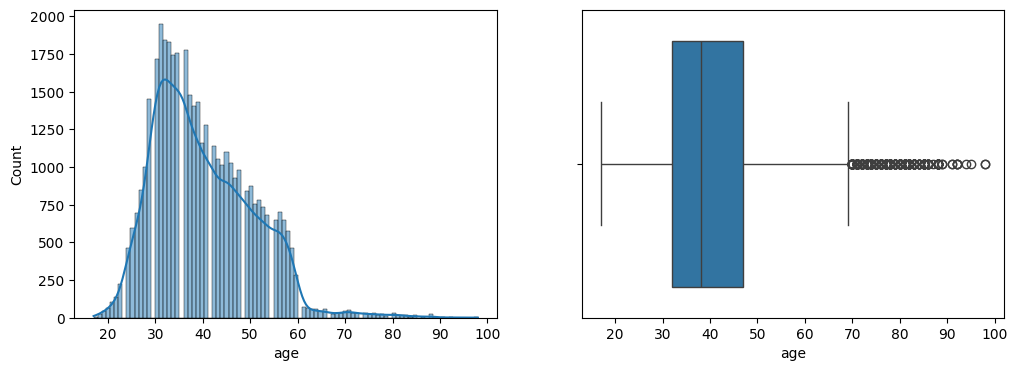

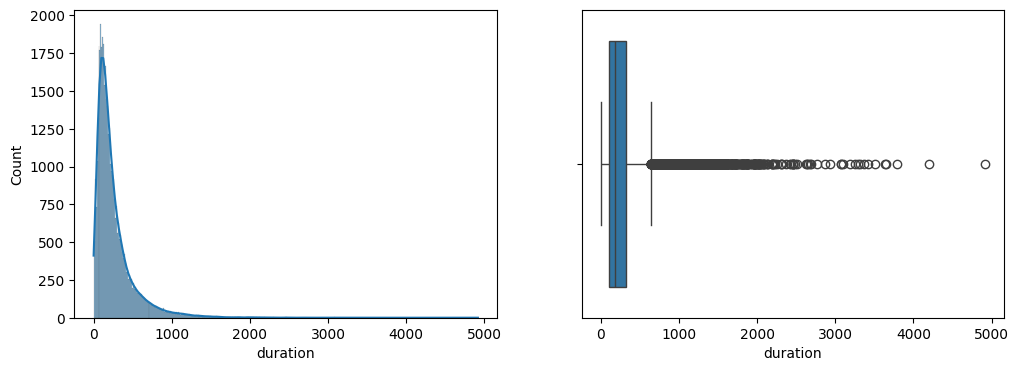

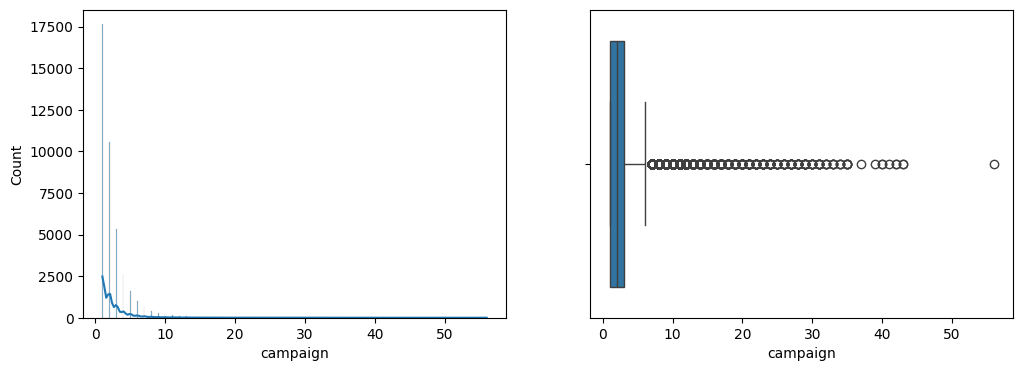

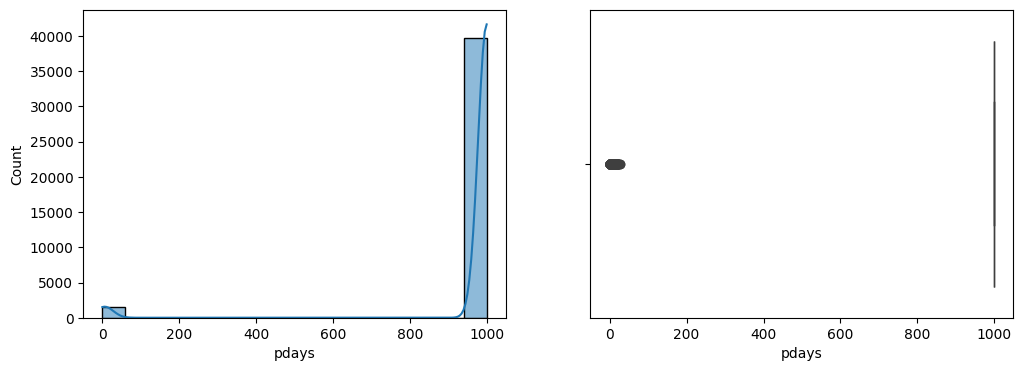

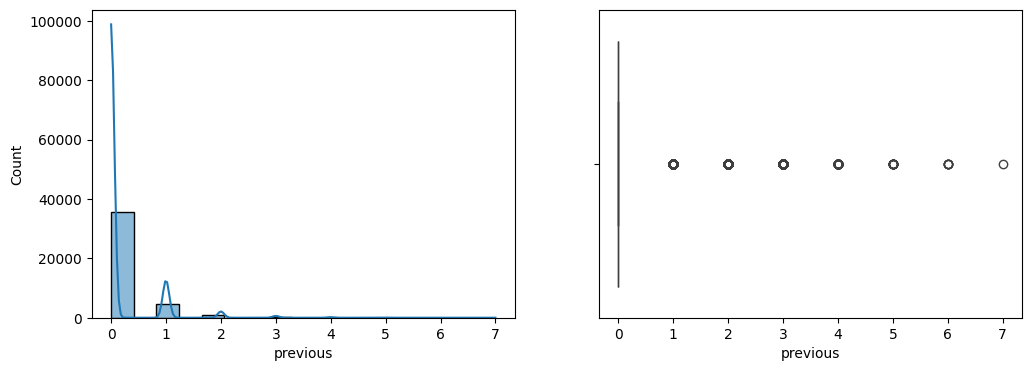

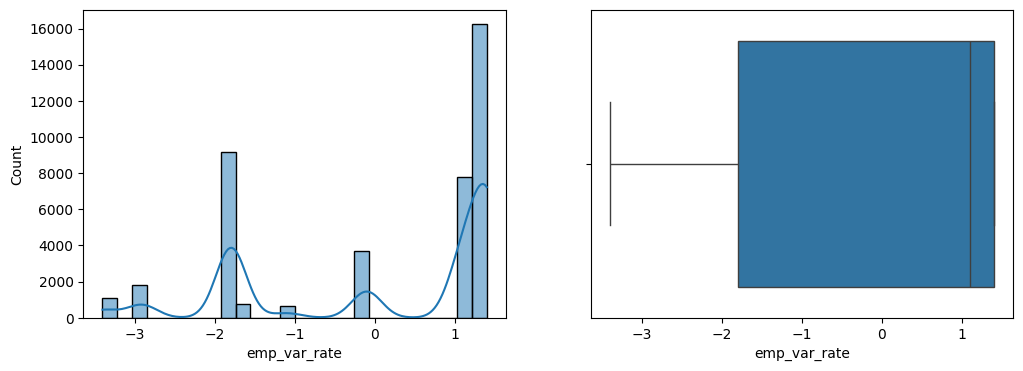

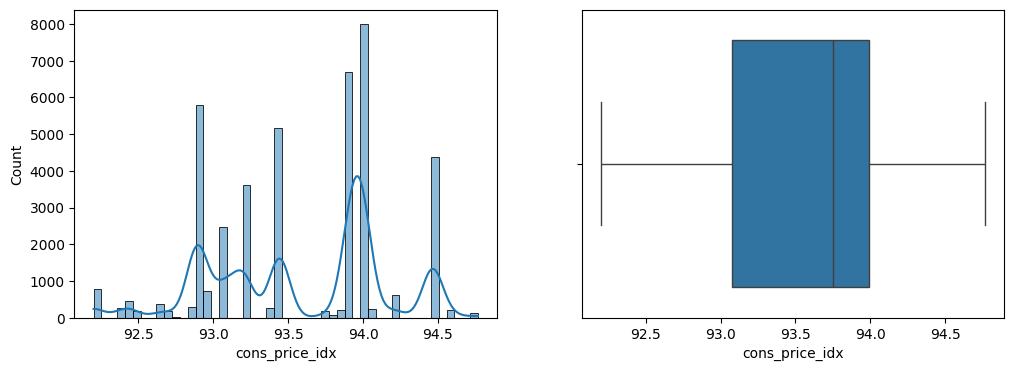

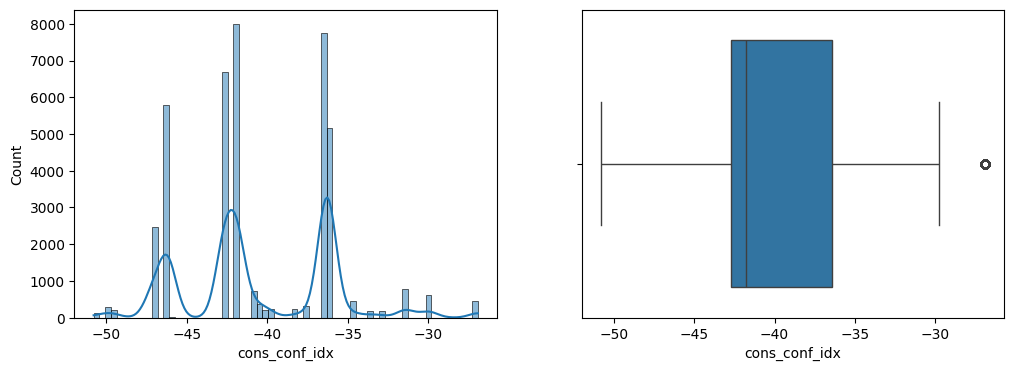

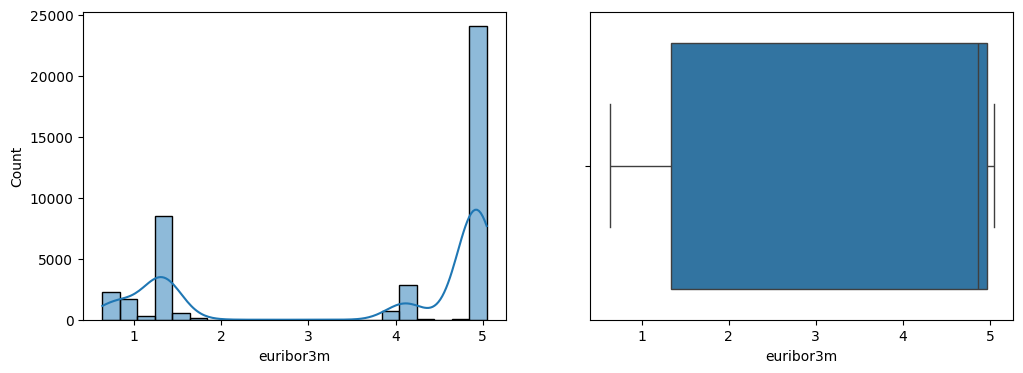

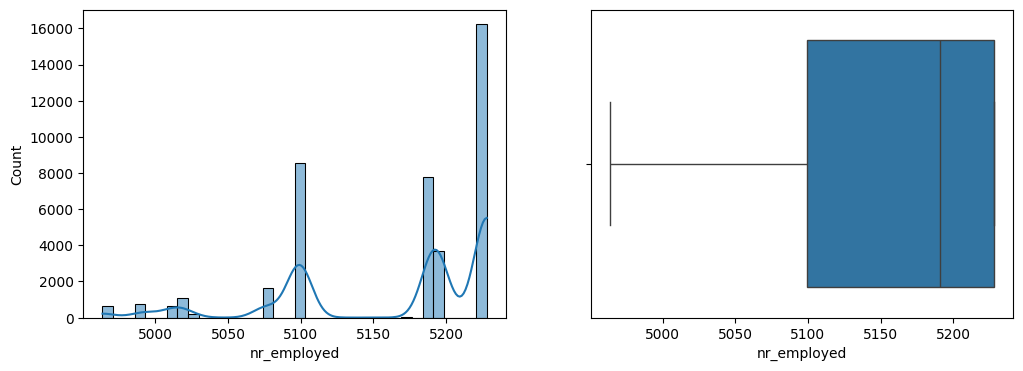

In [25]:
for col in numeric_cols:
    if col=='y':
        continue
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

We see that age and duration are right skewed. Majority of clients did not have long calls, thats why the ones with longer calls are diplayed as outliers. Similarly with the previous contacts, majority of clients were not contacted before in previous campaign, or they are within this campaign contacted not that many times. If the client was previously contacted, in majority cases, it was not many times.

In [28]:
cat_cols = df.select_dtypes(include='category').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

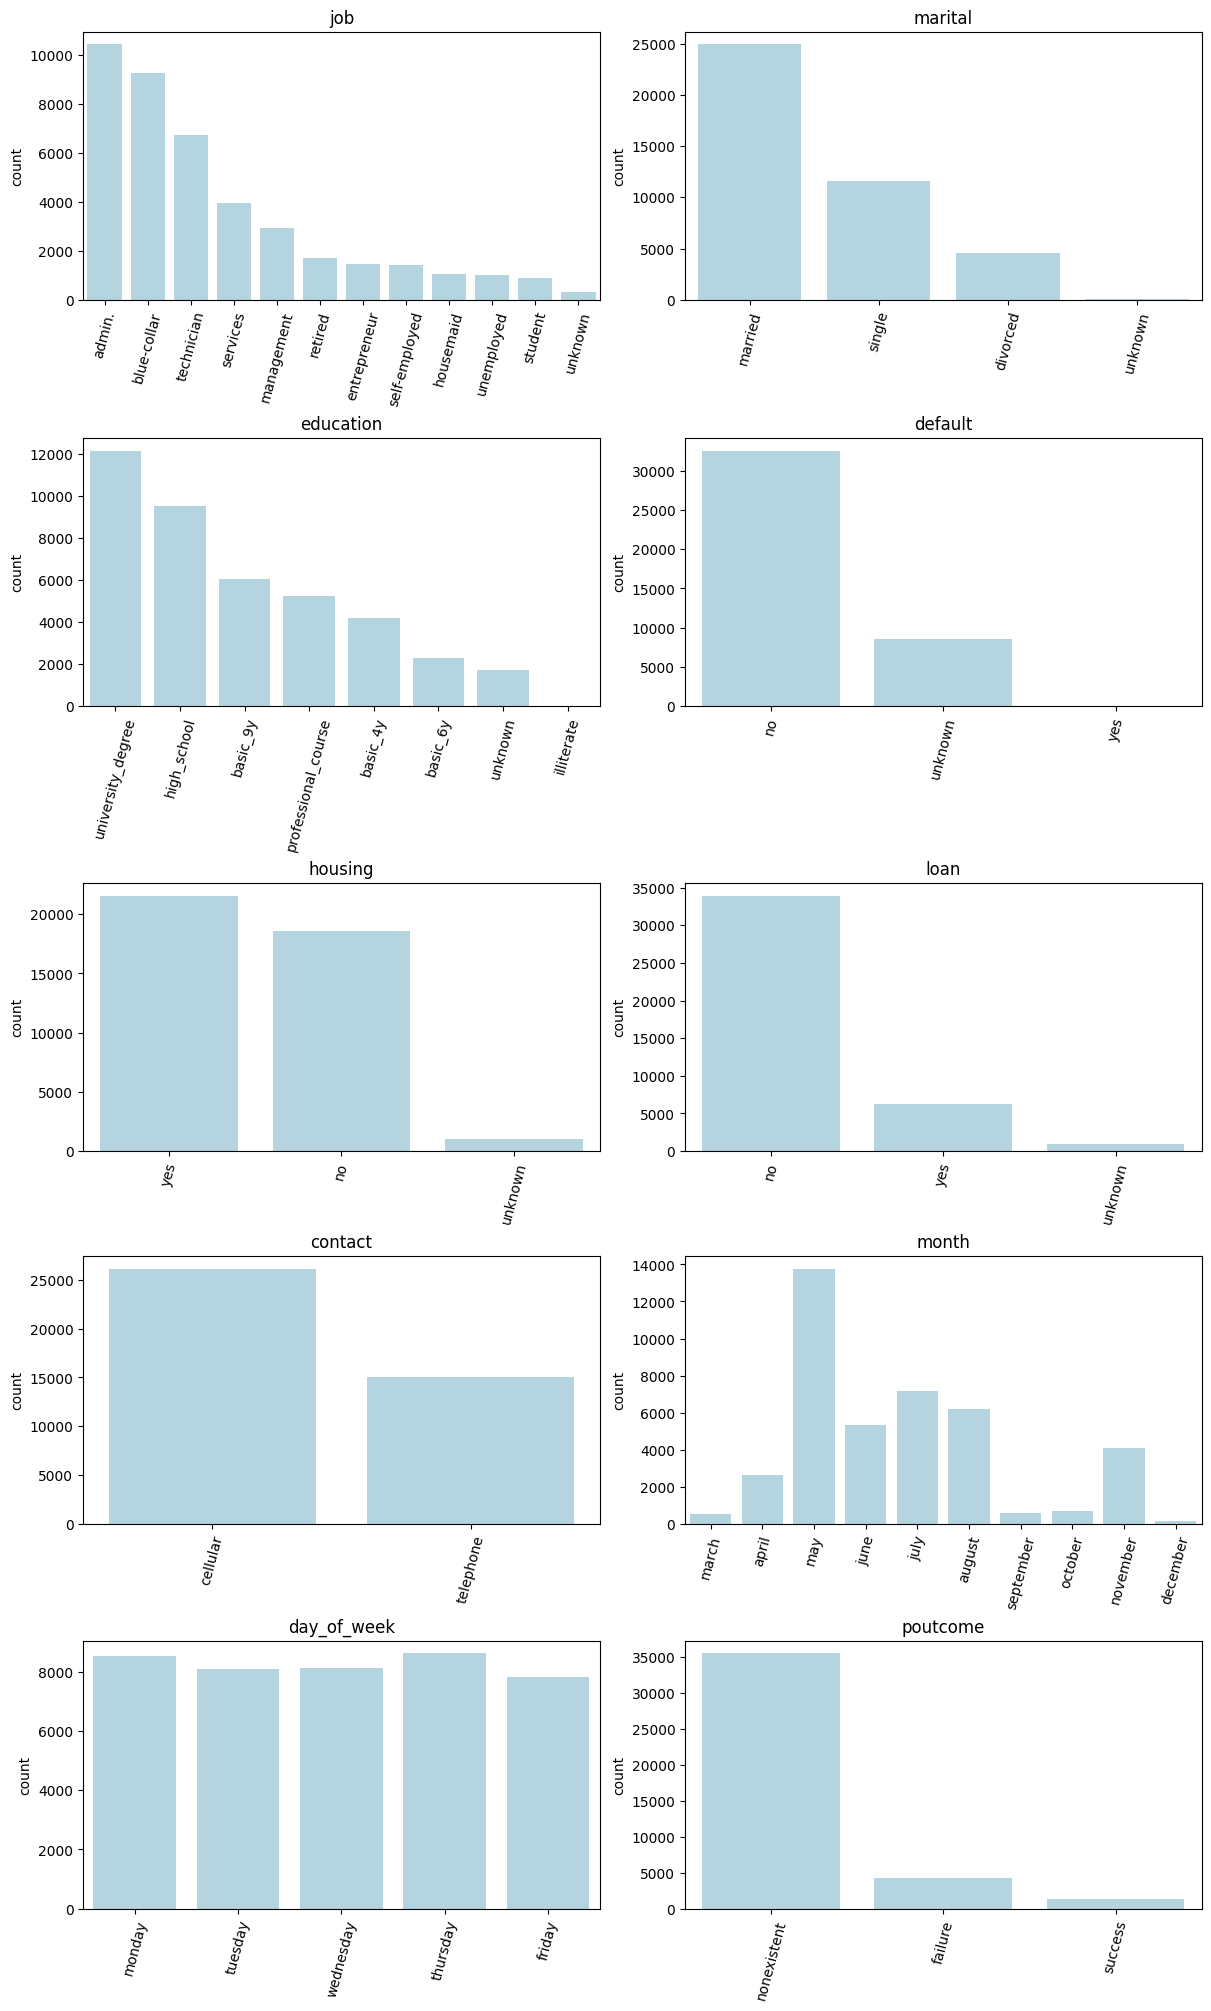

In [47]:
fig, axes = plt.subplots(5, 2, figsize=(12,20), constrained_layout=True, sharey=False)

for col, ax in zip(cat_cols, axes.flat):
    if col=='month' or col=='day_of_week':
        sns.countplot(data = df, x = col, ax=ax, color='lightblue')
    else:    
        sns.countplot(data = df, 
                  x = col, 
                  color='lightblue',
                  order = df[col].value_counts(ascending = False).index,
                  ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=75)
    ax.set(xlabel=None)

We see that the previous otucome is mainly nonexistent since majority of clients weerre not previously contacted. What is interesting to see is that the winnning month for contact is May. Majority of people do not have credit in default, do not have personal loan, but half of them has housing loan.

We can look at similar plots per target variable.

In [56]:
df_deposit = df.loc[df.y == 1]
df_no = df.loc[df.y == 0]

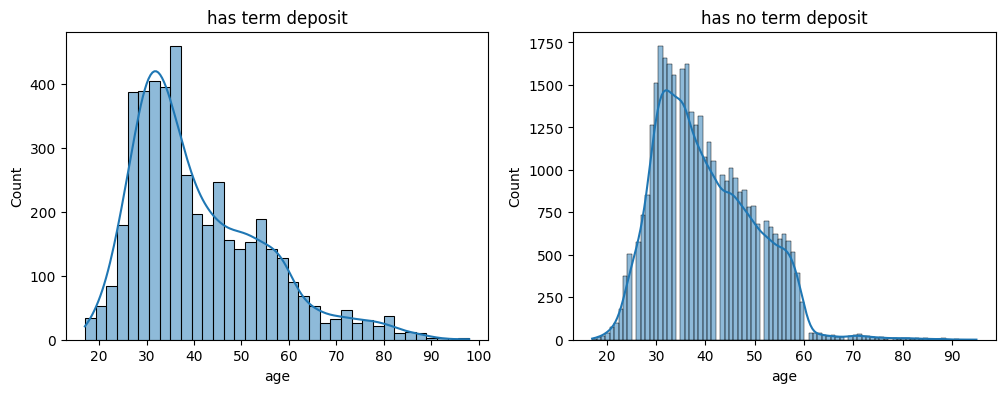

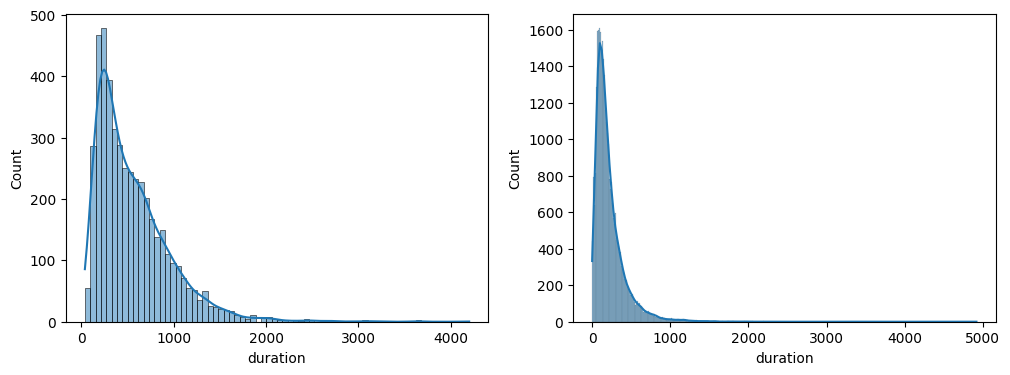

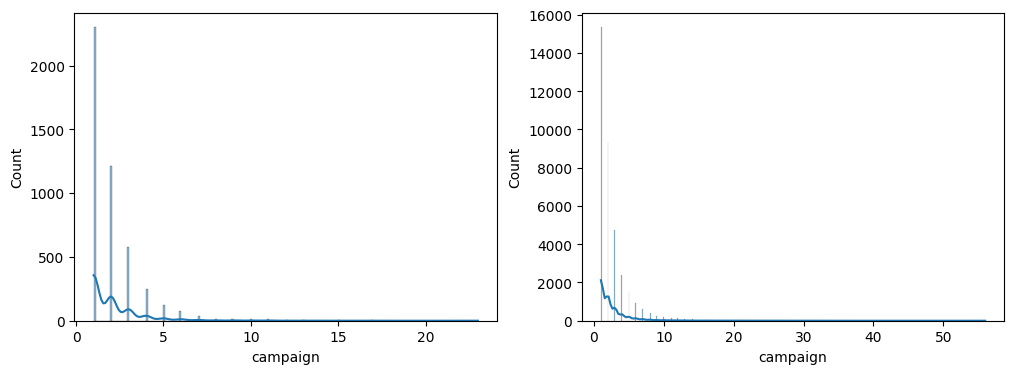

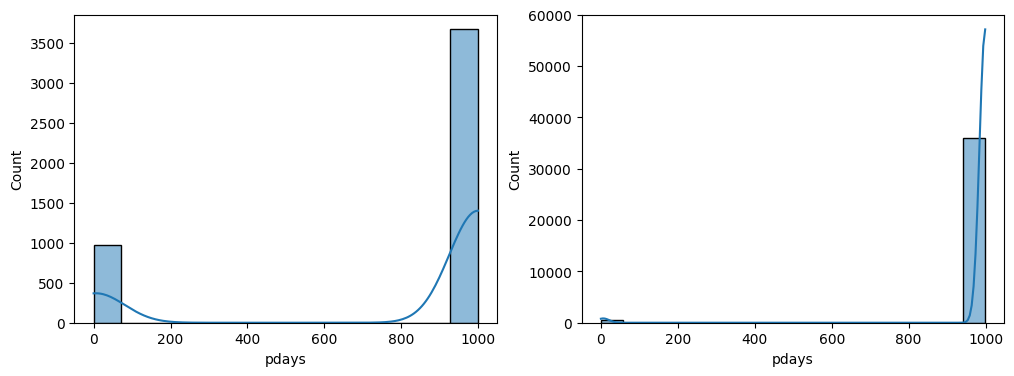

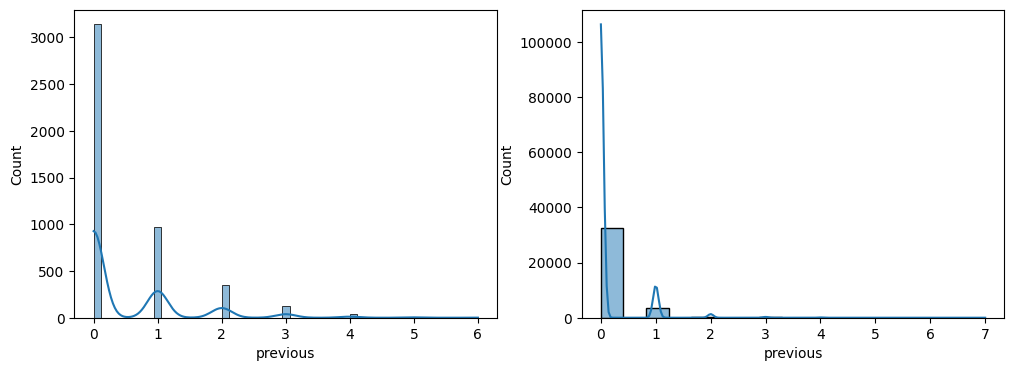

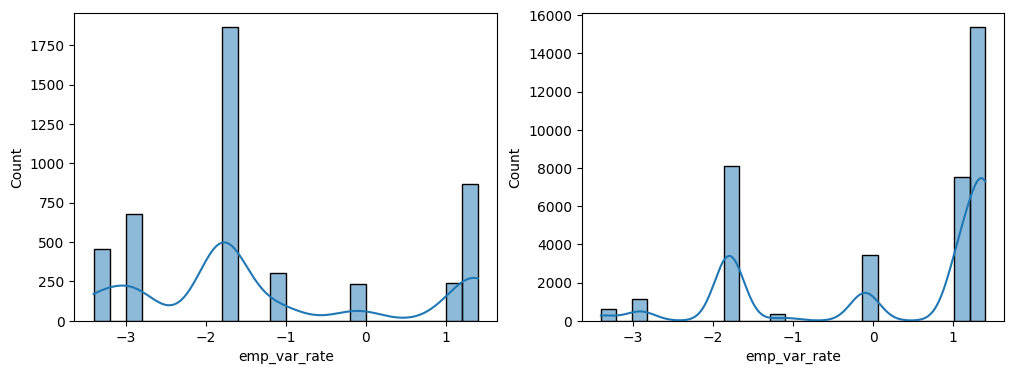

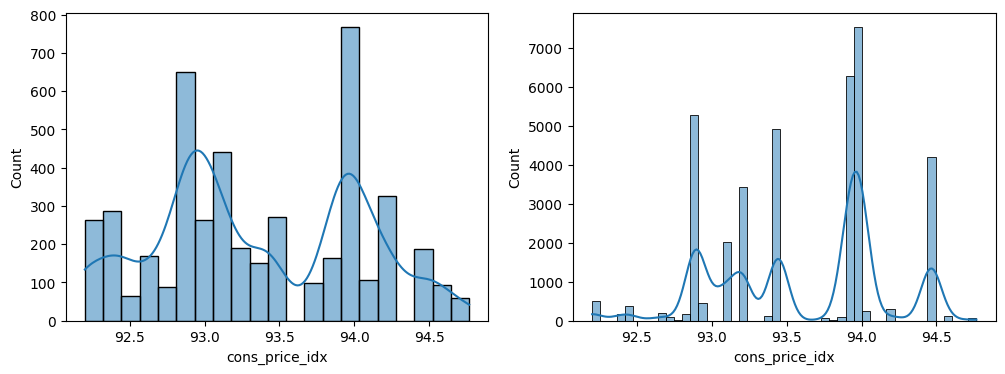

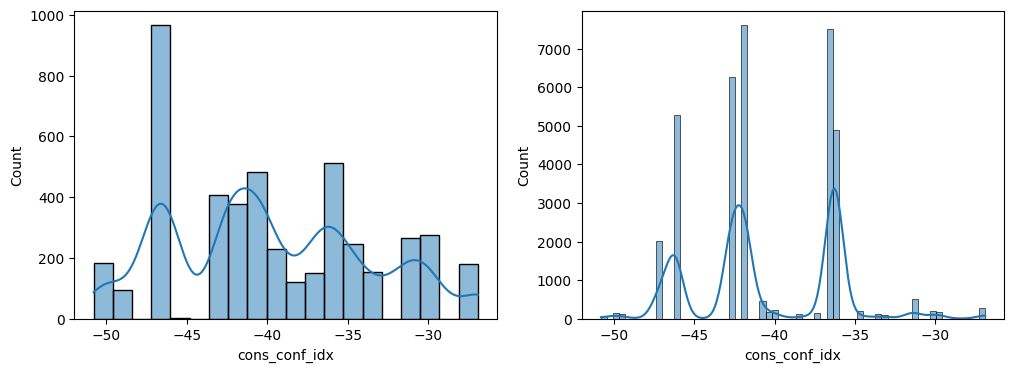

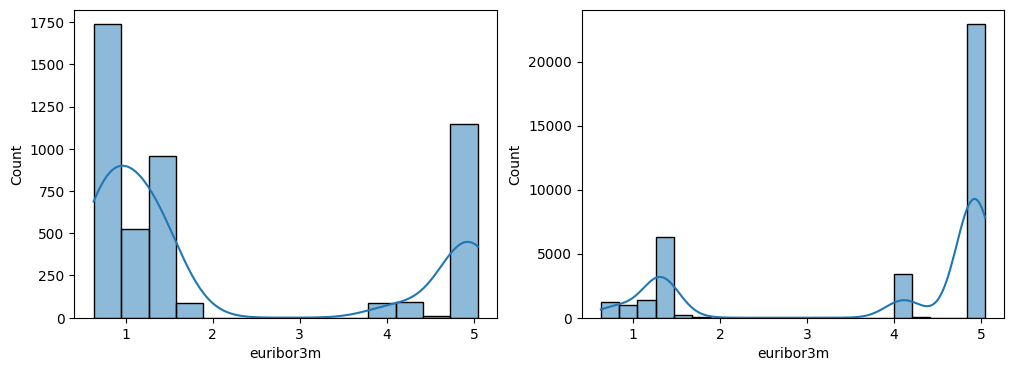

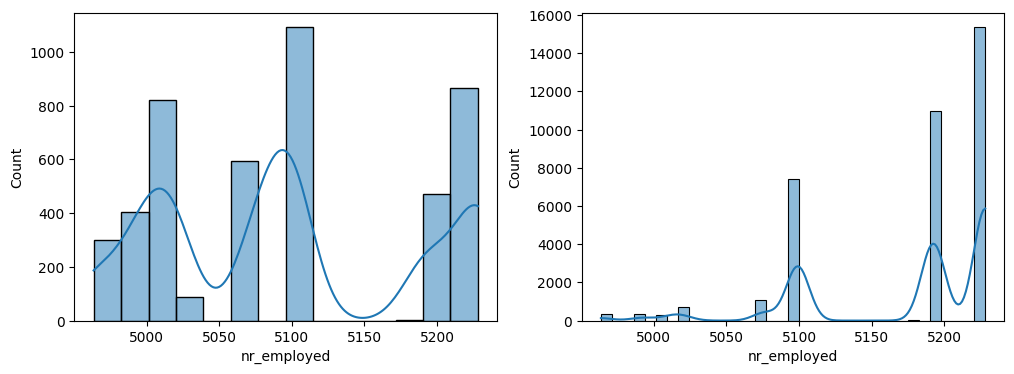

In [57]:
for i, col in enumerate(numeric_cols):
    if col=='y':
        continue
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    if i==0:
        plt.title('has term deposit')
    sns.histplot(df_deposit[col], kde=True)
    plt.subplot(1,2,2)
    if i==0:
        plt.title('has no term deposit')
    sns.histplot(df_no[col], kde=True)
    plt.show()

People with the term deposit had more previous contacts and their calls were longer.

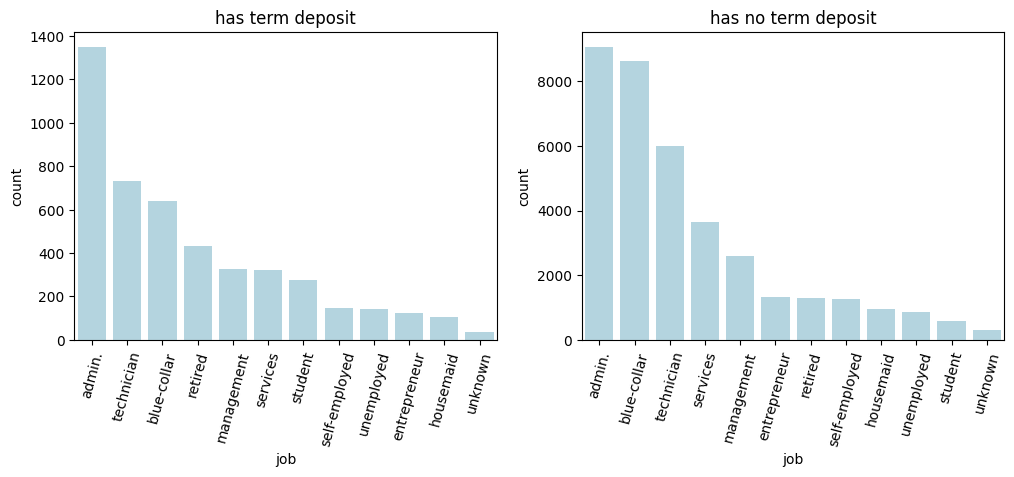

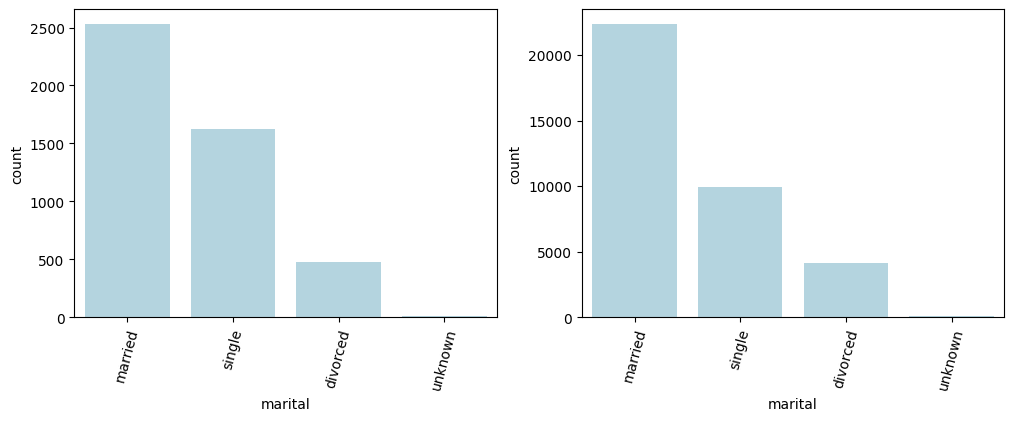

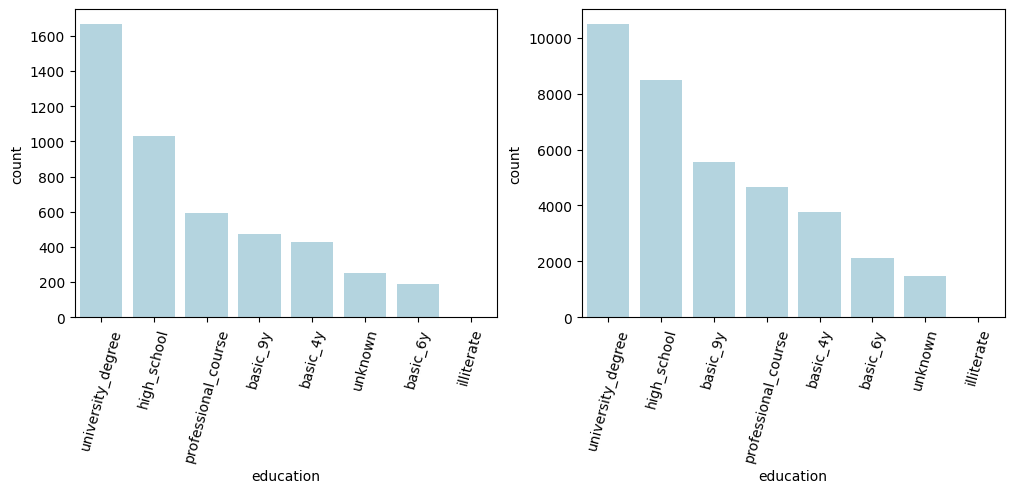

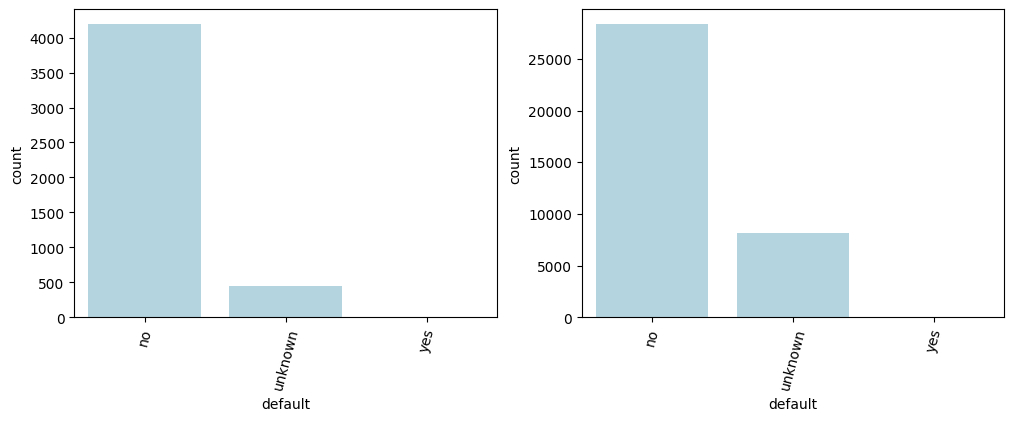

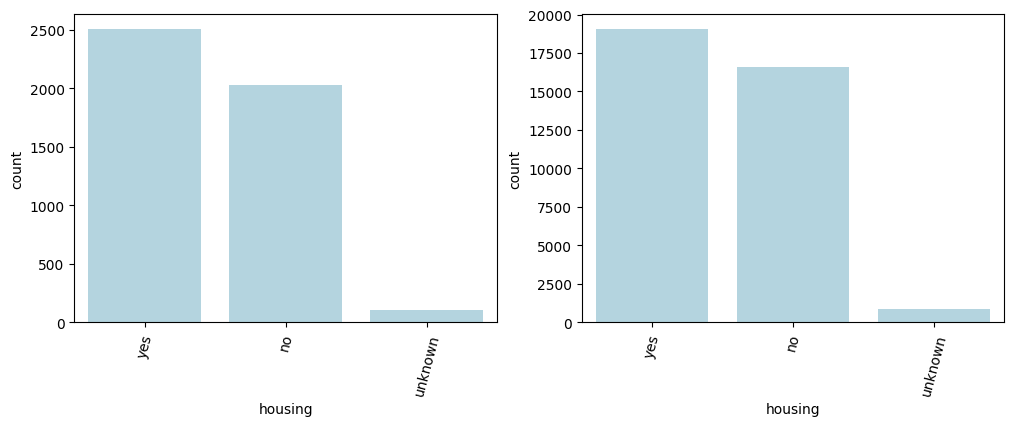

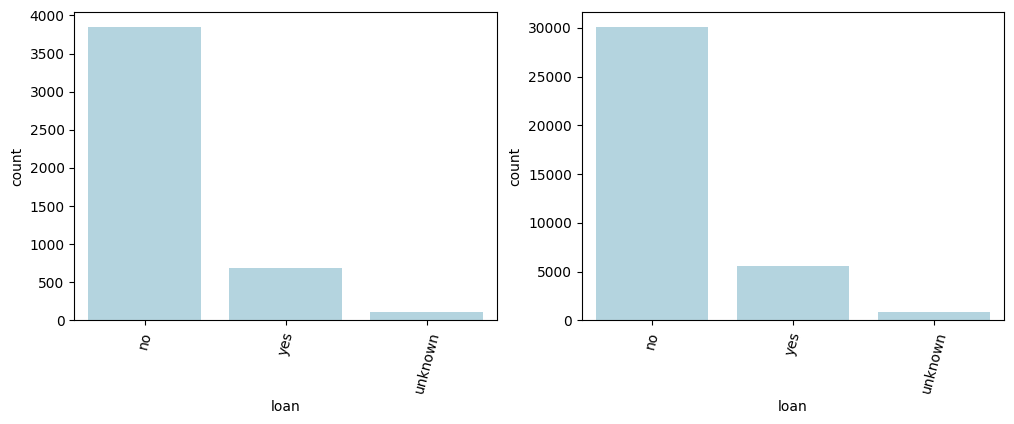

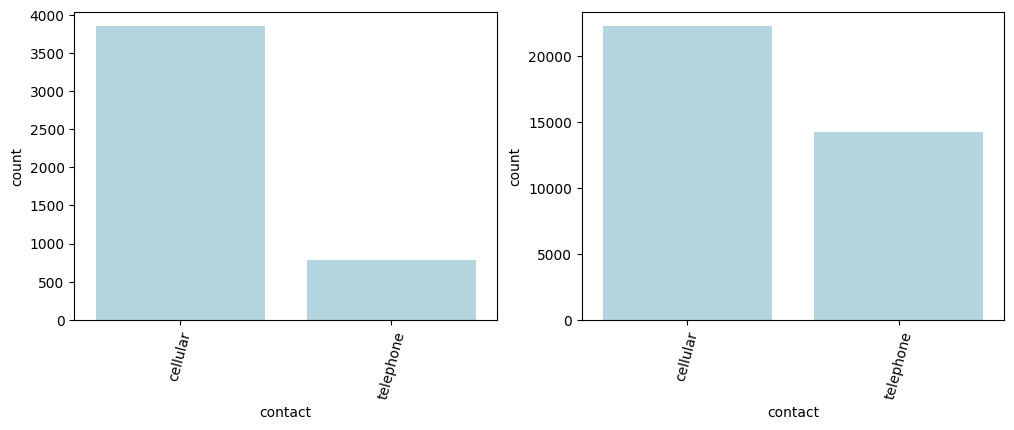

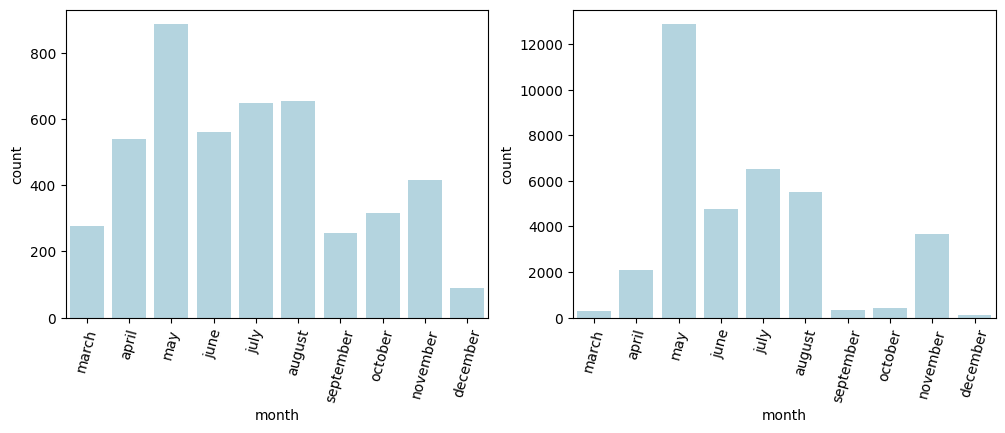

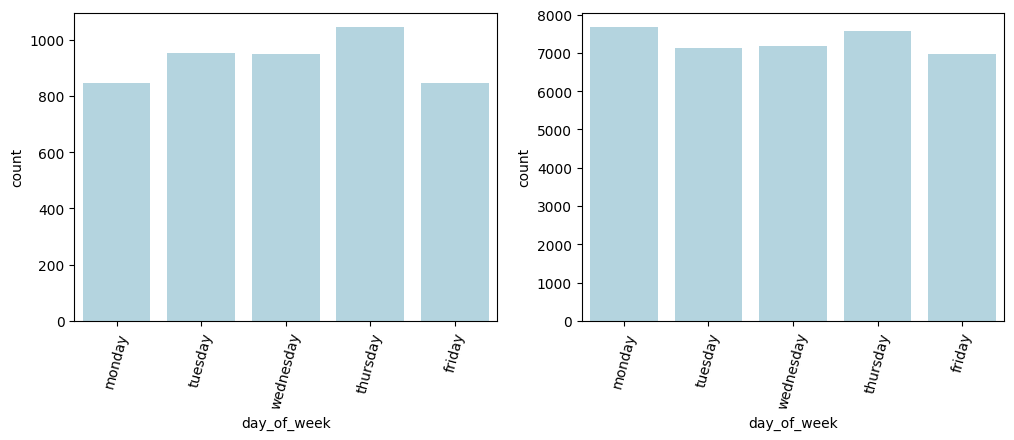

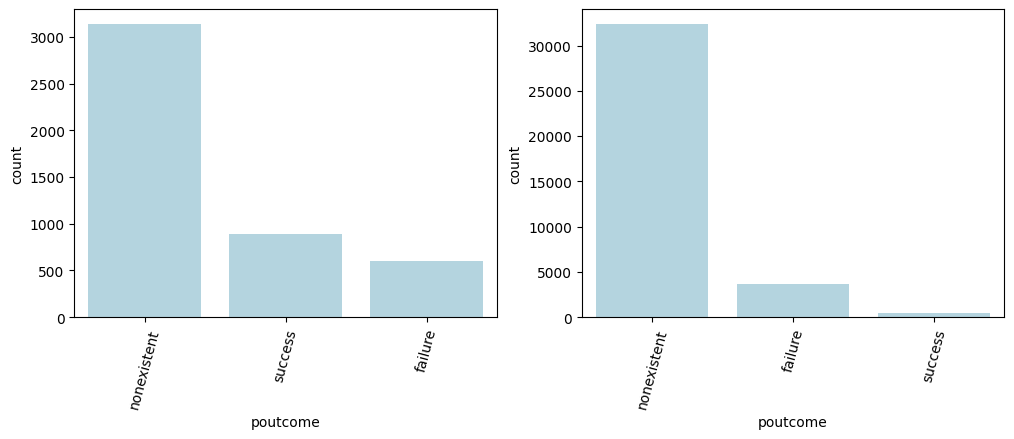

In [61]:
for i, col in enumerate(cat_cols):
    plt.figure(figsize=(12,4))
    
    ax = plt.subplot(1,2,1)
    if i==0:
        plt.title('has term deposit')
    if col=='month' or col=='day_of_week':
        sns.countplot(data = df_deposit, x = col, color='lightblue')  
    else:    
        sns.countplot(data = df_deposit, 
                  x = col, 
                  color='lightblue',
                  order = df_deposit[col].value_counts(ascending = False).index)  
    ax.tick_params(axis='x', rotation=75)    

    ax2 = plt.subplot(1,2,2)
    if i==0:
        plt.title('has no term deposit')
    if col=='month' or col=='day_of_week':
        sns.countplot(data = df_no, x = col, color='lightblue')  
    else:    
        sns.countplot(data = df_no, 
                  x = col, 
                  color='lightblue',
                  order = df_no[col].value_counts(ascending = False).index)   
    ax2.tick_params(axis='x', rotation=75) 
    
    plt.show()

No major findings. There is a higher proportion of successes in the previous campaign for the people with term deposit.

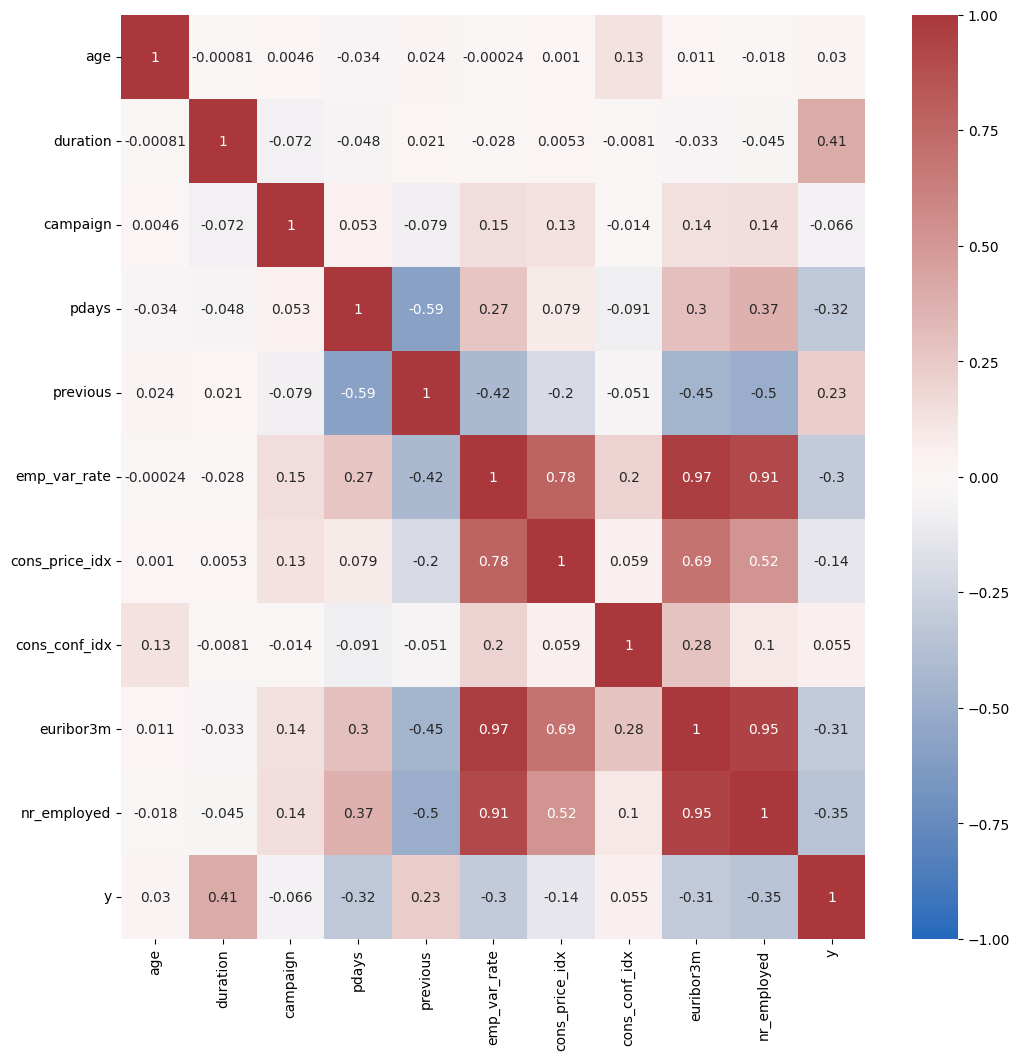

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(df.select_dtypes(include='number').corr(), cbar=True, annot=True, cmap='vlag', vmin = -1, vmax = 1);

Looking at the correlation of features with the target variable, we can see that there is a mild correlation between the target and duration, so the longer the duration of the call, the more likely the client subscribed for the term deposit. Pdays is hard to interpret since there is 999 value meaning no previous contact. There is also a small negative correlation between the target and   number of employees, euribor and employment variation rate. 

## 4. Feature engineering

First we do train-test split to avoid data leakage from test to train data set. We do stratified split since our dataset is imbalanced and we do not want smaller proportion of 1s in the test than in the train set.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = ['y'], axis = 1), df['y'], test_size = 0.2, random_state = 42, stratify=df['y'])
X_train.shape, X_test.shape

((32940, 20), (8236, 20))

In [73]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

y
0    0.887341
1    0.112659
Name: proportion, dtype: float64
y
0    0.887324
1    0.112676
Name: proportion, dtype: float64
